<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part2_Xgboost_largedatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 4.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=a7162119d3842272ddf324ceb76517b05bcc6853417c9283500f6138b26abf9a
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [129]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [130]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [131]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [132]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [133]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [134]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [135]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [136]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [137]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])  
  
Beta = pd.DataFrame(beta_list)     

In [138]:
gamma_list = []
for i in range(1000):
  for j in range(10):
    gamma_list.append(gamma[i])  
  
Gamma = pd.DataFrame(gamma_list)     

In [139]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [140]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta,Gamma], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5,6,7
0,202.845900,6.469930e-10,797.154100,202.845900,3.033431e-10,797.154100,1.351342,0.675671
1,202.845900,-2.392096e-10,797.154100,202.845900,-2.144845e-10,797.154100,1.351342,0.675671
2,202.864927,2.787193e-02,797.107201,202.858634,1.865444e-02,797.122711,1.351342,0.675671
3,202.845900,2.132278e-08,797.154100,202.845900,1.419412e-08,797.154100,1.351342,0.675671
4,202.845968,1.008500e-04,797.153931,202.845946,6.749743e-05,797.153987,1.351342,0.675671


In [142]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [143]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7
0,1.119660e-12,7.295078e-12,1.000000,8.323342e-13,5.063465e-12,1.000000,0.676340,0.676340
1,3.598233e-13,1.537773e-12,1.000000,3.883005e-13,1.699343e-12,1.000000,0.676340,0.676340
2,2.389949e-05,1.810728e-04,0.999941,1.599545e-05,1.211906e-04,0.999961,0.676340,0.676340
3,1.884726e-11,1.416174e-10,1.000000,1.274247e-11,9.530637e-11,1.000000,0.676340,0.676340
4,8.647012e-08,6.551851e-07,1.000000,5.787392e-08,4.385073e-07,1.000000,0.676340,0.676340
...,...,...,...,...,...,...,...,...
9995,9.804634e-01,5.657280e-02,0.009843,9.710931e-01,8.032607e-02,0.014619,0.364761,0.364761
9996,3.390640e-01,9.950094e-01,0.469230,2.771604e-01,9.576029e-01,0.538279,0.364761,0.364761
9997,1.451237e-01,7.137770e-01,0.717231,1.162492e-01,6.196851e-01,0.764238,0.364761,0.364761
9998,2.463536e-02,1.723910e-01,0.942108,1.977828e-02,1.405509e-01,0.953107,0.364761,0.364761


In [144]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [145]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [147]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [148]:
from sklearn.metrics import mean_absolute_error

In [149]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [150]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [151]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [152]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[10:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.035206 for 769 rounds
CV with max_depth=9, min_child_weight=6
[10:58:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

In [153]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [154]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [155]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[11:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.034738200000000004 for 783 rounds
CV with subsample=1.0, colsample=0.9
[11:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

In [156]:
params['subsample'] = .7
params['colsample_bytree'] = 1

In [157]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CV with eta=0.3
[11:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 43.9 s, sys: 197 ms, total: 44.1 s
Wall time: 22.3 s
	MAE 0.030482 for 508 rounds

CV with eta=0.2
[11:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:30] WARNING: /workspace/src/objectiv

In [158]:
params['eta'] = .1

In [159]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[11:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.228564
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:0.214452
[2]	DEV-mae:0.202259
[3]	DEV-mae:0.191546
[4]	DEV-mae:0.182377
[5]	DEV-mae:0.173
[6]	DEV-mae:0.165544
[7]	DEV-mae:0.158418
[8]	DEV-mae:0.152351
[9]	DEV-mae:0.146327
[10]	DEV-mae:0.140614
[11]	DEV-mae:0.135363
[12]	DEV-mae:0.13073
[13]	DEV-mae:0.127
[14]	DEV-mae:0.123507
[15]	DEV-mae:0.120071
[16]	DEV-mae:0.116883
[17]	DEV-mae:0.11367
[18]	DEV-mae:0.11092
[19]	DEV-mae:0.10857
[20]	DEV-mae:0.106439
[21]	DEV-mae:0.104438
[22]	DEV-mae:0.102589
[23]	DEV-mae:0.10123
[24]	DEV-mae:0.10015
[25]	DEV-mae:0.098659
[26]	DEV-mae:0.097236
[27]	DEV-mae:0.095555
[28]	DEV-mae:0.094221
[29]	DEV-mae:0.092916
[30]	DEV-mae:0.092059
[31]	DEV-mae:0.091132
[32]	DEV-mae:0.089979
[33]	DEV-mae:0.088635
[34]	DEV-mae:0.087564
[35]	DEV-mae:0.086913
[36]	DEV-mae:0.086449
[37]	DEV-mae:0.085619
[38]

In [160]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[11:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.229154
[1]	Test-mae:0.215706
[2]	Test-mae:0.204227
[3]	Test-mae:0.19339
[4]	Test-mae:0.184114
[5]	Test-mae:0.174507
[6]	Test-mae:0.167083
[7]	Test-mae:0.160158
[8]	Test-mae:0.153771
[9]	Test-mae:0.147482
[10]	Test-mae:0.141472
[11]	Test-mae:0.136004
[12]	Test-mae:0.131252
[13]	Test-mae:0.127296
[14]	Test-mae:0.123867
[15]	Test-mae:0.120249
[16]	Test-mae:0.116812
[17]	Test-mae:0.113557
[18]	Test-mae:0.110811
[19]	Test-mae:0.108636
[20]	Test-mae:0.106367
[21]	Test-mae:0.104286
[22]	Test-mae:0.102312
[23]	Test-mae:0.100849
[24]	Test-mae:0.099533
[25]	Test-mae:0.098282
[26]	Test-mae:0.096878
[27]	Test-mae:0.095266
[28]	Test-mae:0.093941
[29]	Test-mae:0.09266
[30]	Test-mae:0.09171
[31]	Test-mae:0.090777
[32]	Test-mae:0.0897
[33]	Test-mae:0.088365
[34]	Test-mae:0.08725
[35]	Test-mae:0.086631
[36]	Test-mae:0.086179
[37]	Test-mae:0.085198
[38]	Test-mae:0

In [161]:
mean_absolute_error(best_model.predict(dtest), y_test1)

0.023851772659277147

In [162]:
best_model.save_model("my_model.model")

In [163]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[11:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


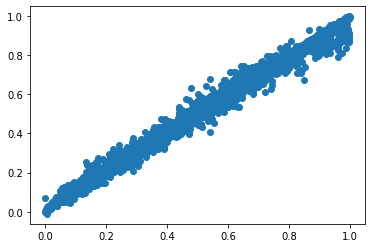

In [164]:
plt.scatter(y_test1,p)

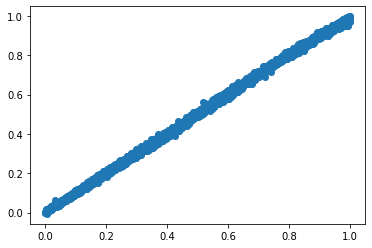

In [165]:
plt.scatter(y_train,q)

In [166]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.007526743489125592
R2 score of training set is 0.9992952237063704


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.03461476362599119
R2 score of test set is 0.9849595791839332
